In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

## Creating the model

In [38]:
#MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 


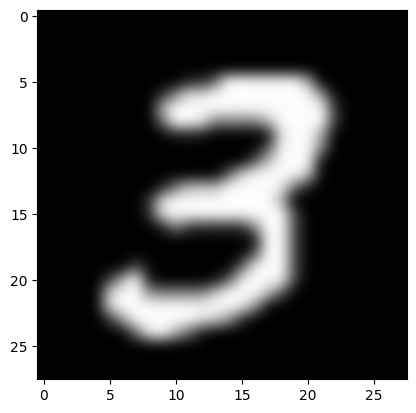

In [39]:
#Let's test with an image
plt.imshow(train_images[7], cmap='gray', interpolation='bicubic')

In [40]:
# Image Rescaling -- In preprocessing, pixel values of grayscale images (0 to 255) are rescaled beetween 0 and 1. 
# This normalization helps stabilize and speed up model training by preventing extreme gradient values, algorithm unstable or slow to converge.

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [41]:
train_images[7]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [42]:
train_labels[7]

3

In [43]:
# After rescaling images, labels are converted to one-hot encoding.
# One-hot encoding turns categorical labels (0-9) into binary vectors. For example, label 2 becomes [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [44]:
# testing the model

train_labels[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [45]:
#Constructing the Convolutional Neural Network Architecture

#Initialize a sequential model
model = models.Sequential([ 
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
    ## First convolutional layer: learns 32 filters using a 3x3 kernel
    layers.MaxPooling2D((2, 2)), 
    # First Max Pooling layer: reduces dimensionality by half (14x14)
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Second convolutional layer: learns 64 filters using a 3x3 kernel
    layers.MaxPooling2D((2, 2)),
    # Second Max Pooling layer: reduces dimensionality by half (7x7)
    layers.Conv2D(64, (3, 3), activation='relu'), 
    # Third convolutional layer: learns 64 filters using a 3x3 kernel
    ])


c:\Users\User\OneDrive\Documentos\GitHub\Neural-Network-NumberPrediction\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


A dense or fully connected layer is a layer where each neuron is connected to all neurons in the previous layer. This means each neuron receives a weighted input from every neuron in the previous layer.

In our model, we add a dense layer with the following line of code:

In [46]:
model.add(layers.Flatten())

In [47]:
model.add(layers.Dense(64, activation='relu'))

In [48]:
#Output layer with 10 neurons (one for each class 0-9) and softmax activation function
#Provides the probability that the input belongs to each class

model.add(layers.Dense(10, activation='softmax'))

In [49]:
# Model Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
#Model Training
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8761 - loss: 0.4244
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9835 - loss: 0.0535
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9885 - loss: 0.0362
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9906 - loss: 0.0291
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9927 - loss: 0.0232
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9947 - loss: 0.0170
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9953 - loss: 0.0139
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9951 - loss: 0.0146
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9972 - loss: 0.0093
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9965 - loss: 0.0103


In [51]:
# Calculating the model's accuracy on test data
test_ñloss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9870 - loss: 0.0440


In [52]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9896000027656555


In [53]:
# Save the model to a file

#model.save('mnist_model.h5')

## Using the Model to make predictions.

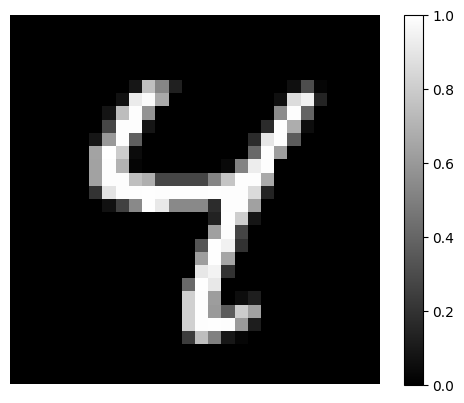

In [54]:
#Generating a Random Image Using the Dataset

imagen = test_images[6].reshape((28, 28))
plt.imshow(imagen, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

In [55]:
from tensorflow.keras.models import load_model
import numpy as np


#Importing the Created Model File
modelo_cargado = load_model('mnist_model.h5')

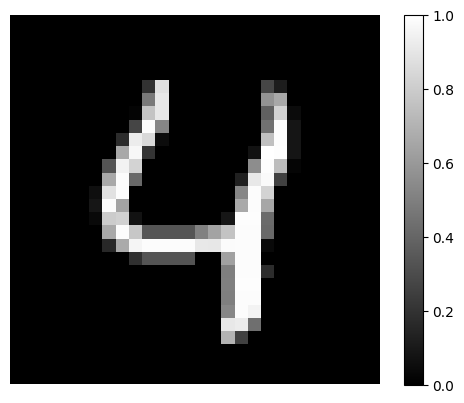

In [56]:
#Generating a Random Image Using the Dataset and showing the image to compare

nueva_imagen = test_images[4]
plt.imshow(nueva_imagen, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()
nueva_imagen = np.expand_dims(nueva_imagen, axis=0)

In [57]:
#Predicting the Digit in the Image

prediccion = modelo_cargado.predict(nueva_imagen)
digito = np.argmax(prediccion)
print(f'El modelo predice que el digito es: {digito}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
El modelo predice que el digito es: 4


In [58]:
import netron

In [59]:
#Using the Neutron Library to Visualize Model Links
netron.start('mnist_model.h5')

Serving 'mnist_model.h5' at http://localhost:8080


('localhost', 8080)

In [60]:
import gradio as gr

In [63]:
#Using Gradio to Create an Interactive Prediction Tool

modelo = tf.keras.models.load_model('mnist_model.h5')

def clasificar_imagen(imagen):
    imagen = np.reshape(imagen, (1, 28, 28, 1)).astype('float32')/255
    prediccion = modelo.predict(imagen)
    digito = np.argmax(prediccion)
    return str(digito)

interfaz = gr.Interface(fn=clasificar_imagen, inputs='sketchpad', outputs='text')
interfaz.launch()

Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


c:\Users\User\OneDrive\Documentos\GitHub\Neural-Network-NumberPrediction\.venv\Lib\site-packages\gradio\analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 3.50.2, however version 4.29.0 is available, please upgrade. 
--------
  
